In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

# 0. Together

K-means is one of the most simple clustering algorithms out there. You randomly (or, in order to make convergence quicker, cleverly) choose K centroids in the feature space, you assign each data point to the centroid/cluster closest to it, and then recalculate the centroid by taking the mean (for each predictor) of all the data points in each cluster. 

This process iteratively repeats until either 1) cluster assignments don't change from step to step OR 2) the centroid doesn't change much from step to step.

<img src="https://drive.google.com/uc?export=view&id=1RHRfcPIjIZ_-IMOE00gyzVadlaGxXPh8" width=350px />

One thing to keep in mind with K-Means is that is assumes *spherical* variance within each cluster. That means that K-means behaves as if--within each cluster--all predictors have the same variance. Because of this, it is often good to either check this assumption, or z-score your variables so that they're on the same scale.

# 1. K-Means Function

Let's write our own simplified K-means function. Your function, `KM()` should take in two arguments:

- `df` a dataframe with all of your data.
- `k` the number of clusters to fit.

and apply K-Means to it. Remember that the steps of K means are:

**1**. Randomly select k centroids.
    - I recommend choosing `k` random data points from `df`. You can do this by using `np.random.choice(range(0,df.shape[0], k)` to select the indices for `k` randomly selected rows.
    
**2**. Assign each data point from `df` to the closest centroid.
    - You'll need to calculate the distance between each data point and each centroid. Perhaps look at the KNN classwork to see how to do that using `np.linalg.norm()`.
    - I recommend storing cluster/centroid membership by having a dictionary with one key for each cluster/centroid, and the value is a list of row indices pertaining to the data points in each cluster (see HINT 1 for an example of this.
    
**3**. Re-calculate the cluster mean/centroid
    - For each centroid/cluster, find the mean value for each predictor/feature by taking the mean for that feature from all the data points assigned to the centroid/cluster.
    
**4**. Repeat Steps 2-3 until the change in centroid positions are all less than 0.0001
    - in other words, calculate how far each centroid moved. If all of them moved less than 0.0001 units, then stop.
    
**5**. Return the cluster assignments by returning the dictonary of the clusters and their memberships that you create in #2.

### HINT 1:

Store your cluster memberships like this (in this case k = 3, and there are only 20 datapoints, but your function should take any k, and any number of data points):

```clust = {"1": [0,7,4,5,12,18,20],
          "2": [10,8,3,2,14,17,19],
          "3": [1,6,7,8,9,11,13,15,16]}```

In [15]:
def KM(df,k):
    
    # 1. randomly select k centroids
    centroids = [df.iloc[l] for l in np.random.choice(range(0,df.shape[0]), k)]
#     print(centroids)
    #---repeat------------------------------------------------------

    # 2. iterate through all the rows in df, and assign them to the
    # centroid closest to them, store those assignments in a dict

    converged = False

    while not converged:
        
        # add all the dictionary keys
        clust = {}
        for c in range(0,k):
            clust[str(c)] = []
#         print(clust)
        for dataPoint in range(0, df.shape[0]):

            # calculate distances between dataPoint and each centroid
            dists = [np.linalg.norm(df.iloc[dataPoint]-cent) for cent in centroids]

            # find the centroid that's closest
            small_indx = np.argmin(dists)

            # add dataPoint to that cluster
            clust[str(small_indx)].append(dataPoint)

        # 3. re-calculate the center/centroid of each cluster

        new_centroids = [[] for c in range(0,k)] #create an empty list of k 0's

        for c in range(0,k):
            new_centroids[c] = [df.iloc[clust[str(c)],x].mean() for x in range(0, df.shape[1])]

        new_centroids = np.array(new_centroids)

        # 4. check whether you can stop iterating by checking whether the
        # distance between the previous position and current position is
        # less than 0.0001 for all k centroids.

        change = np.array([np.linalg.norm(centroids[i]-new_centroids[i]) for i in range(0,k)])
        converged = np.all(change < 0.0001)

        # set new_centroids to be established centroids
        centroids = new_centroids

    #---/repeat------------------------------------------------------

    # 5. Return cluster memberships dictionary
    print(clust)
    return(clust)

# 2. Using your K-Means Function

Now that you have done the incredibly impressive work of writing (with some help!) your own K-means function. Let's use it and compare the results to what we'd get from `sklearn`!

First, use your OWN function `KM()` to do K-means on `data` with k = 5. Then generate the cluster assingments using the code provided. Then make a ggplot scatterplot of your clusters.

Second, use sklearn's `KMeans()` function to do K-means on `data` with k = 5. Then generate the cluster assignments using `.predict()`. Then make a ggplot scatterplot of your clusters.

In [16]:
data = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/programmers3.csv")

data.head()

,py,r
0,106.451501,79.506954
1,83.223622,64.026255
2,94.357541,97.060185
3,97.594351,84.000590
4,94.851220,76.256649


{'0': [55, 72, 76, 85, 89, 93, 100, 104, 105, 107, 110, 119, 123, 132, 144, 201, 202, 203, 204, 205, 206, 207, 209, 210, 212, 213, 214, 215, 217, 218, 220, 221, 222, 223, 225, 226, 227, 228, 229, 231, 232, 233, 234, 237, 238, 241, 243, 245, 246, 247, 248, 249], '1': [8, 47, 102, 103, 111, 114, 117, 120, 126, 129, 131, 136, 141, 142, 143, 145, 146, 148], '2': [51, 101, 106, 108, 109, 112, 113, 115, 116, 118, 121, 122, 124, 125, 127, 128, 130, 133, 134, 135, 137, 138, 139, 140, 147, 149, 200, 219, 224, 230, 235, 239, 240, 242, 244], '3': [150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 216, 236], '4': [0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 52,

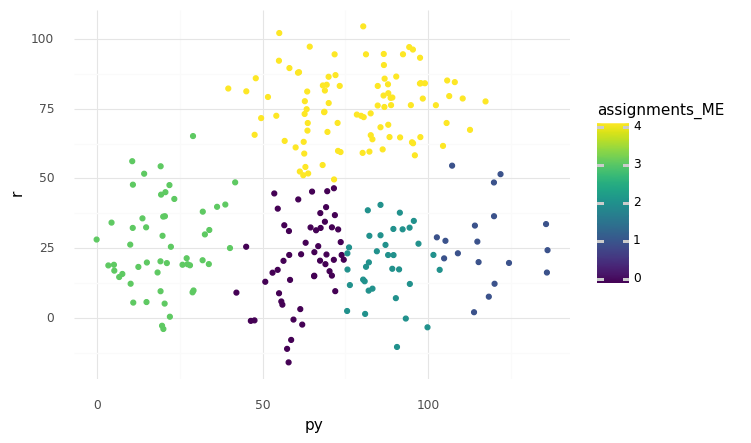

<ggplot: (8763123936841)>

In [17]:
# USING YOUR FUNCTION-----

# run k-means
clusters = KM(data, 5)

# generate assignments
assignments = np.array([999 for row in range(0, data.shape[0])])

for cluster in clusters:
    assignments[clusters[cluster]] = cluster
    
data["assignments_ME"] = assignments

# create ggplot scatter plot of data, using x, y and color = "assignments_ME"
ggplot(data, aes("py", "r", color = "assignments_ME")) + geom_point() + theme_minimal()

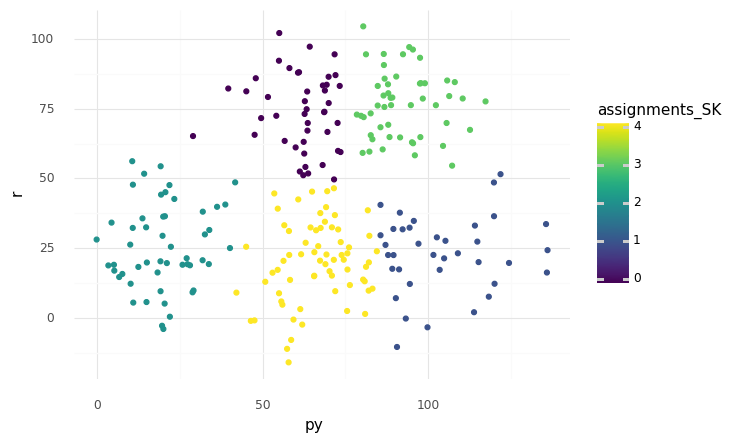

<ggplot: (8763123643739)>

In [5]:
# USING SKLEARN

# create kmeans model
m = KMeans(5)
# fit kmeans model

m.fit(data)
# get assignments

assignments_SK = m.predict(data)

# add assignments to data
data["assignments_SK"] = assignments_SK

# create another ggplot scatter plot of data, using x, y and color = "assignments_SK"
ggplot(data, aes("py", "r", color = "assignments_SK")) + geom_point() + theme_minimal()

### *Question*

How do your results compare?
<img src="https://drive.google.com/uc?export=view&id=1ghyQPx1N8dmU3MV4TrANvqNhGwnLni72" width = 200px />